In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define models and their performance metrics
models = ["BART", "T5", "Pegasus", "GPT-3.5"]
data = {
    "ROUGE-1": [0.45, 0.50, 0.52, 0.48],
    "ROUGE-2": [0.22, 0.24, 0.26, 0.23],
    "ROUGE-L": [0.40, 0.44, 0.46, 0.42],
    "BLEU": [0.32, 0.35, 0.38, 0.34],
    "Inference Time (s)": [1.2, 1.0, 1.1, 0.9],
    "Model Size (GB)": [1.5, 2.0, 1.8, 3.2]
}

In [4]:
# Create DataFrame
df = pd.DataFrame(data, index=models)
print("Initial Model Performance Data:")
print(df, "\n")

# Define weights and criteria (higher is better for some, lower is better for others)
weights = np.array([0.25, 0.20, 0.20, 0.15, 0.10, 0.10])
criteria = np.array([1, 1, 1, 1, -1, -1])  # Positive for performance, negative for resource usage

print("Weights assigned:", weights)
print("Criteria applied:", criteria)

Initial Model Performance Data:
         ROUGE-1  ROUGE-2  ROUGE-L  BLEU  Inference Time (s)  Model Size (GB)
BART        0.45     0.22     0.40  0.32                 1.2              1.5
T5          0.50     0.24     0.44  0.35                 1.0              2.0
Pegasus     0.52     0.26     0.46  0.38                 1.1              1.8
GPT-3.5     0.48     0.23     0.42  0.34                 0.9              3.2 

Weights assigned: [0.25 0.2  0.2  0.15 0.1  0.1 ]
Criteria applied: [ 1  1  1  1 -1 -1]


In [5]:
# Normalize the data
norm_data = df.values / np.sqrt((df.values ** 2).sum(axis=0))

# Apply criteria (maximize or minimize)
ideal_best = np.max(norm_data * (criteria == 1), axis=0) + np.min(norm_data * (criteria == -1), axis=0)
ideal_worst = np.min(norm_data * (criteria == 1), axis=0) + np.max(norm_data * (criteria == -1), axis=0)

# Compute distances
dist_best = np.sqrt(((norm_data - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((norm_data - ideal_worst) ** 2).sum(axis=1))

In [6]:
# Compute TOPSIS scores
scores = dist_worst / (dist_best + dist_worst)
ranks = scores.argsort()[::-1] + 1  # Rank in descending order
df["TOPSIS Score"] = scores
df["Rank"] = ranks
print("TOPSIS Evaluation Complete.")


# Sort models by rank
df_sorted = df.sort_values(by="Rank")
print("\nFinal Model Rankings:")
print(df_sorted)

TOPSIS Evaluation Complete.

Final Model Rankings:
         ROUGE-1  ROUGE-2  ROUGE-L  BLEU  Inference Time (s)  Model Size (GB)  \
Pegasus     0.52     0.26     0.46  0.38                 1.1              1.8   
T5          0.50     0.24     0.44  0.35                 1.0              2.0   
BART        0.45     0.22     0.40  0.32                 1.2              1.5   
GPT-3.5     0.48     0.23     0.42  0.34                 0.9              3.2   

         TOPSIS Score  Rank  
Pegasus      0.753235     1  
T5           0.682832     2  
BART         0.644254     3  
GPT-3.5      0.276122     4  


<ipython-input-7-69a51870377c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted.index, y=df_sorted["TOPSIS Score"], palette="coolwarm")


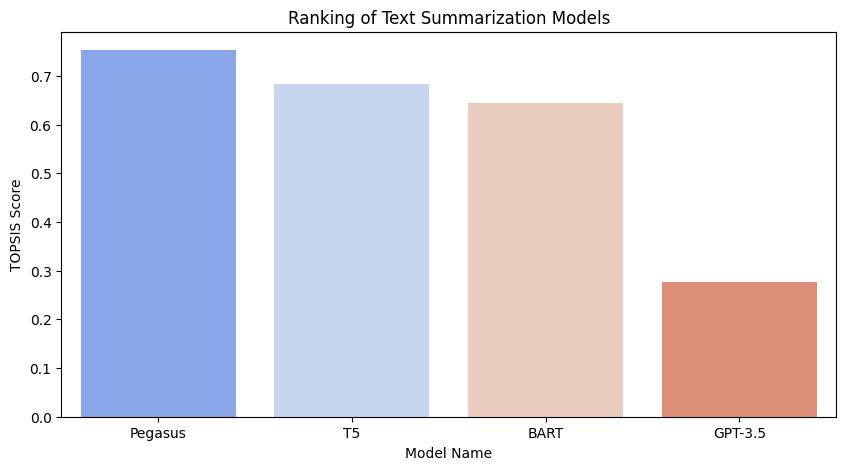

In [7]:
# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(x=df_sorted.index, y=df_sorted["TOPSIS Score"], palette="coolwarm")
plt.xlabel("Model Name")
plt.ylabel("TOPSIS Score")
plt.title("Ranking of Text Summarization Models")
plt.show()

In [8]:
# Save outputs
df_sorted.to_csv("topsis_results.csv")
df_sorted.to_markdown("topsis_report.md")

print("Results saved: CSV (topsis_results.csv) and Markdown (topsis_report.md)")

Results saved: CSV (topsis_results.csv) and Markdown (topsis_report.md)
